Let's import all the necessary packages for the exercises

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import pandas
import xarray as xr

If any of the above gives an error, uncomment the two lines below to install the missing packages:

In [86]:
# !conda install cartopy
# !conda install xarray

# Exercise 1: Explore the 'Anatomy of a Figure'

Let's explore a dataset about renewable energy generation in the world. You can read about the dataset on the website: https://ourworldindata.org/grapher/modern-renewable-energy-consumption \
The dataset is already in our workspace, so you can load it into a 'dataframe' with the following command:

In [87]:
df = pandas.read_csv("modern-renewable-energy-consumption.csv")
display(df) # let's display the full data set

Entity      Code  Year  Geo Biomass Other - TWh  Solar Generation - TWh  \
0     Africa       NaN  1971                 0.164000                0.000000   
1     Africa       NaN  1972                 0.165000                0.000000   
2     Africa       NaN  1973                 0.170000                0.000000   
3     Africa       NaN  1974                 0.175000                0.000000   
4     Africa       NaN  1975                 0.172000                0.000000   
...      ...       ...   ...                      ...                     ...   
6155   World  OWID_WRL  2017               596.420471              445.466278   
6156   World  OWID_WRL  2018               643.032043              576.230896   
6157   World  OWID_WRL  2019               674.745361              703.949768   
6158   World  OWID_WRL  2020               703.916443              846.229370   
6159   World  OWID_WRL  2021               762.782654             1032.501221   

      Wind Generation - TWh  Hydro Generation - TWh  
0                  0.000000               26.013391  
1                  0.000000               29.633196  
2                  0.000000               31.345707  
3                  0.000000               35.667076  
4                  0.000000               37.717968  
...                     ...                     ...  
6155            1140.393066             4069.982666  
6156            1269.979248             4183.166504  
6157            1420.544067             4231.376953  
6158            1596.428223             4345.990234  
6159            1861.939819             4273.827637  

[6160 rows x 7 columns]

As you can see, there are 6160 entries (the rows). Each row contains data about the countries of the world and their renewable energy generation, per year, since 1971. Note that the last rows contain the summed values of total global production per year. 

**a) Can you make my line plot of global solar energy generation per year, better? I added some code which already extracts the appropriate data for the plot.**\
(hint: check out the 'anatomy of a figure' image from the lecture. What is missing in my plot? You can copy code from the Lecture notebook)\
\
**b) Similarly, can you make a plot of the gloal wind energy generation, per year? Can you plot this curve on top of the previous curve? Remember to include a legend.**

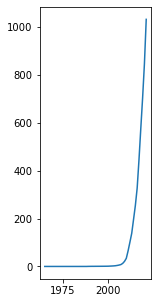

In [88]:
world=df.groupby(["Entity"]).get_group("World")  # this groups the data by 'Entity' (column 1) and extracts the data relative to the 'World'
world_solar = world['Solar Generation - TWh'] # this extracts the column relative to the solar energy generation
year = world['Year'] # this extract the year

fig, ax = plt.subplots(figsize=(2,5))
ax.plot(year, world_solar)
plt.show()

# Exercise 2: Explore the power of Python maps 

Let's now look at another dataset about global power plants, and learn how we can use Cartopy to visualize the data on a map. You can read more about it on the website: https://datasets.wri.org/dataset/globalpowerplantdatabase \
As before, dataset is already in our workspace, so you can load it into a 'dataframe' with the following command:

In [89]:
df = pandas.read_csv("global_power_plant_database.csv", low_memory=False)
display(df[1:2]) # let's display the first row of the data set

country country_long          name   gppd_idnr  capacity_mw  latitude  \
1     AFG  Afghanistan  Kandahar DOG  WKS0070144         10.0     31.67   

   longitude primary_fuel other_fuel1 other_fuel2  ...  \
1     65.795        Solar         NaN         NaN  ...   

  estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
1                         18.43                          17.48   

  estimated_generation_gwh_2015 estimated_generation_gwh_2016  \
1                         18.25                          17.7   

  estimated_generation_gwh_2017 estimated_generation_note_2013  \
1                         18.29                SOLAR-V1-NO-AGE   

  estimated_generation_note_2014  estimated_generation_note_2015  \
1                SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE   

   estimated_generation_note_2016  estimated_generation_note_2017  
1                 SOLAR-V1-NO-AGE                 SOLAR-V1-NO-AGE  

[1 rows x 36 columns]

In [90]:
display(df[-2:-1]) # let's display the last row of the data set

country country_long                              name     gppd_idnr  \
34934     ZWE     Zimbabwe  Hwange Coal Power Plant Zimbabwe  GEODB0040404   

       capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
34934        920.0  -18.3835      26.47         Coal         NaN         NaN   

       ... estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
34934  ...                           NaN                            NaN   

      estimated_generation_gwh_2015 estimated_generation_gwh_2016  \
34934                           NaN                           NaN   

      estimated_generation_gwh_2017 estimated_generation_note_2013  \
34934                        2785.1                  NO-ESTIMATION   

      estimated_generation_note_2014  estimated_generation_note_2015  \
34934                  NO-ESTIMATION                   NO-ESTIMATION   

       estimated_generation_note_2016  estimated_generation_note_2017  
34934                   NO-ESTIMATION              CAPACITY-FACTOR-V1  

[1 rows x 36 columns]

Now we have almost 35000 entries, containing data about the current power plants in the world (up until June 2021).
Some are Solar powered, some Wind powered, some Coal powered, etc. We are interested in visualizing the power plants on a map, to understand where the renewable energy is actually being produced.

**a) Run the code provided, to visualize the locations of all the power plants on a map. Try to read through what the code does.**

In [91]:
col_list = ['longitude', 'latitude', 'primary_fuel'] # here we extract the columns we want from the data set: the coordinates of the power plants, and their energy type

df2 = pandas.read_csv("global_power_plant_database.csv", usecols=col_list)  # all power plants
lon_all=df['longitude'][:]
lat_all=df['latitude'][:]

solar=df2.groupby(["primary_fuel"]).get_group("Solar") # only solar power plants
lon_solar=solar['longitude'][:] 
lat_solar=solar['latitude'][:]

wind=df2.groupby(["primary_fuel"]).get_group("Wind") # only wind power plants
lon_wind=wind['longitude'][:]
lat_wind=wind['latitude'][:]

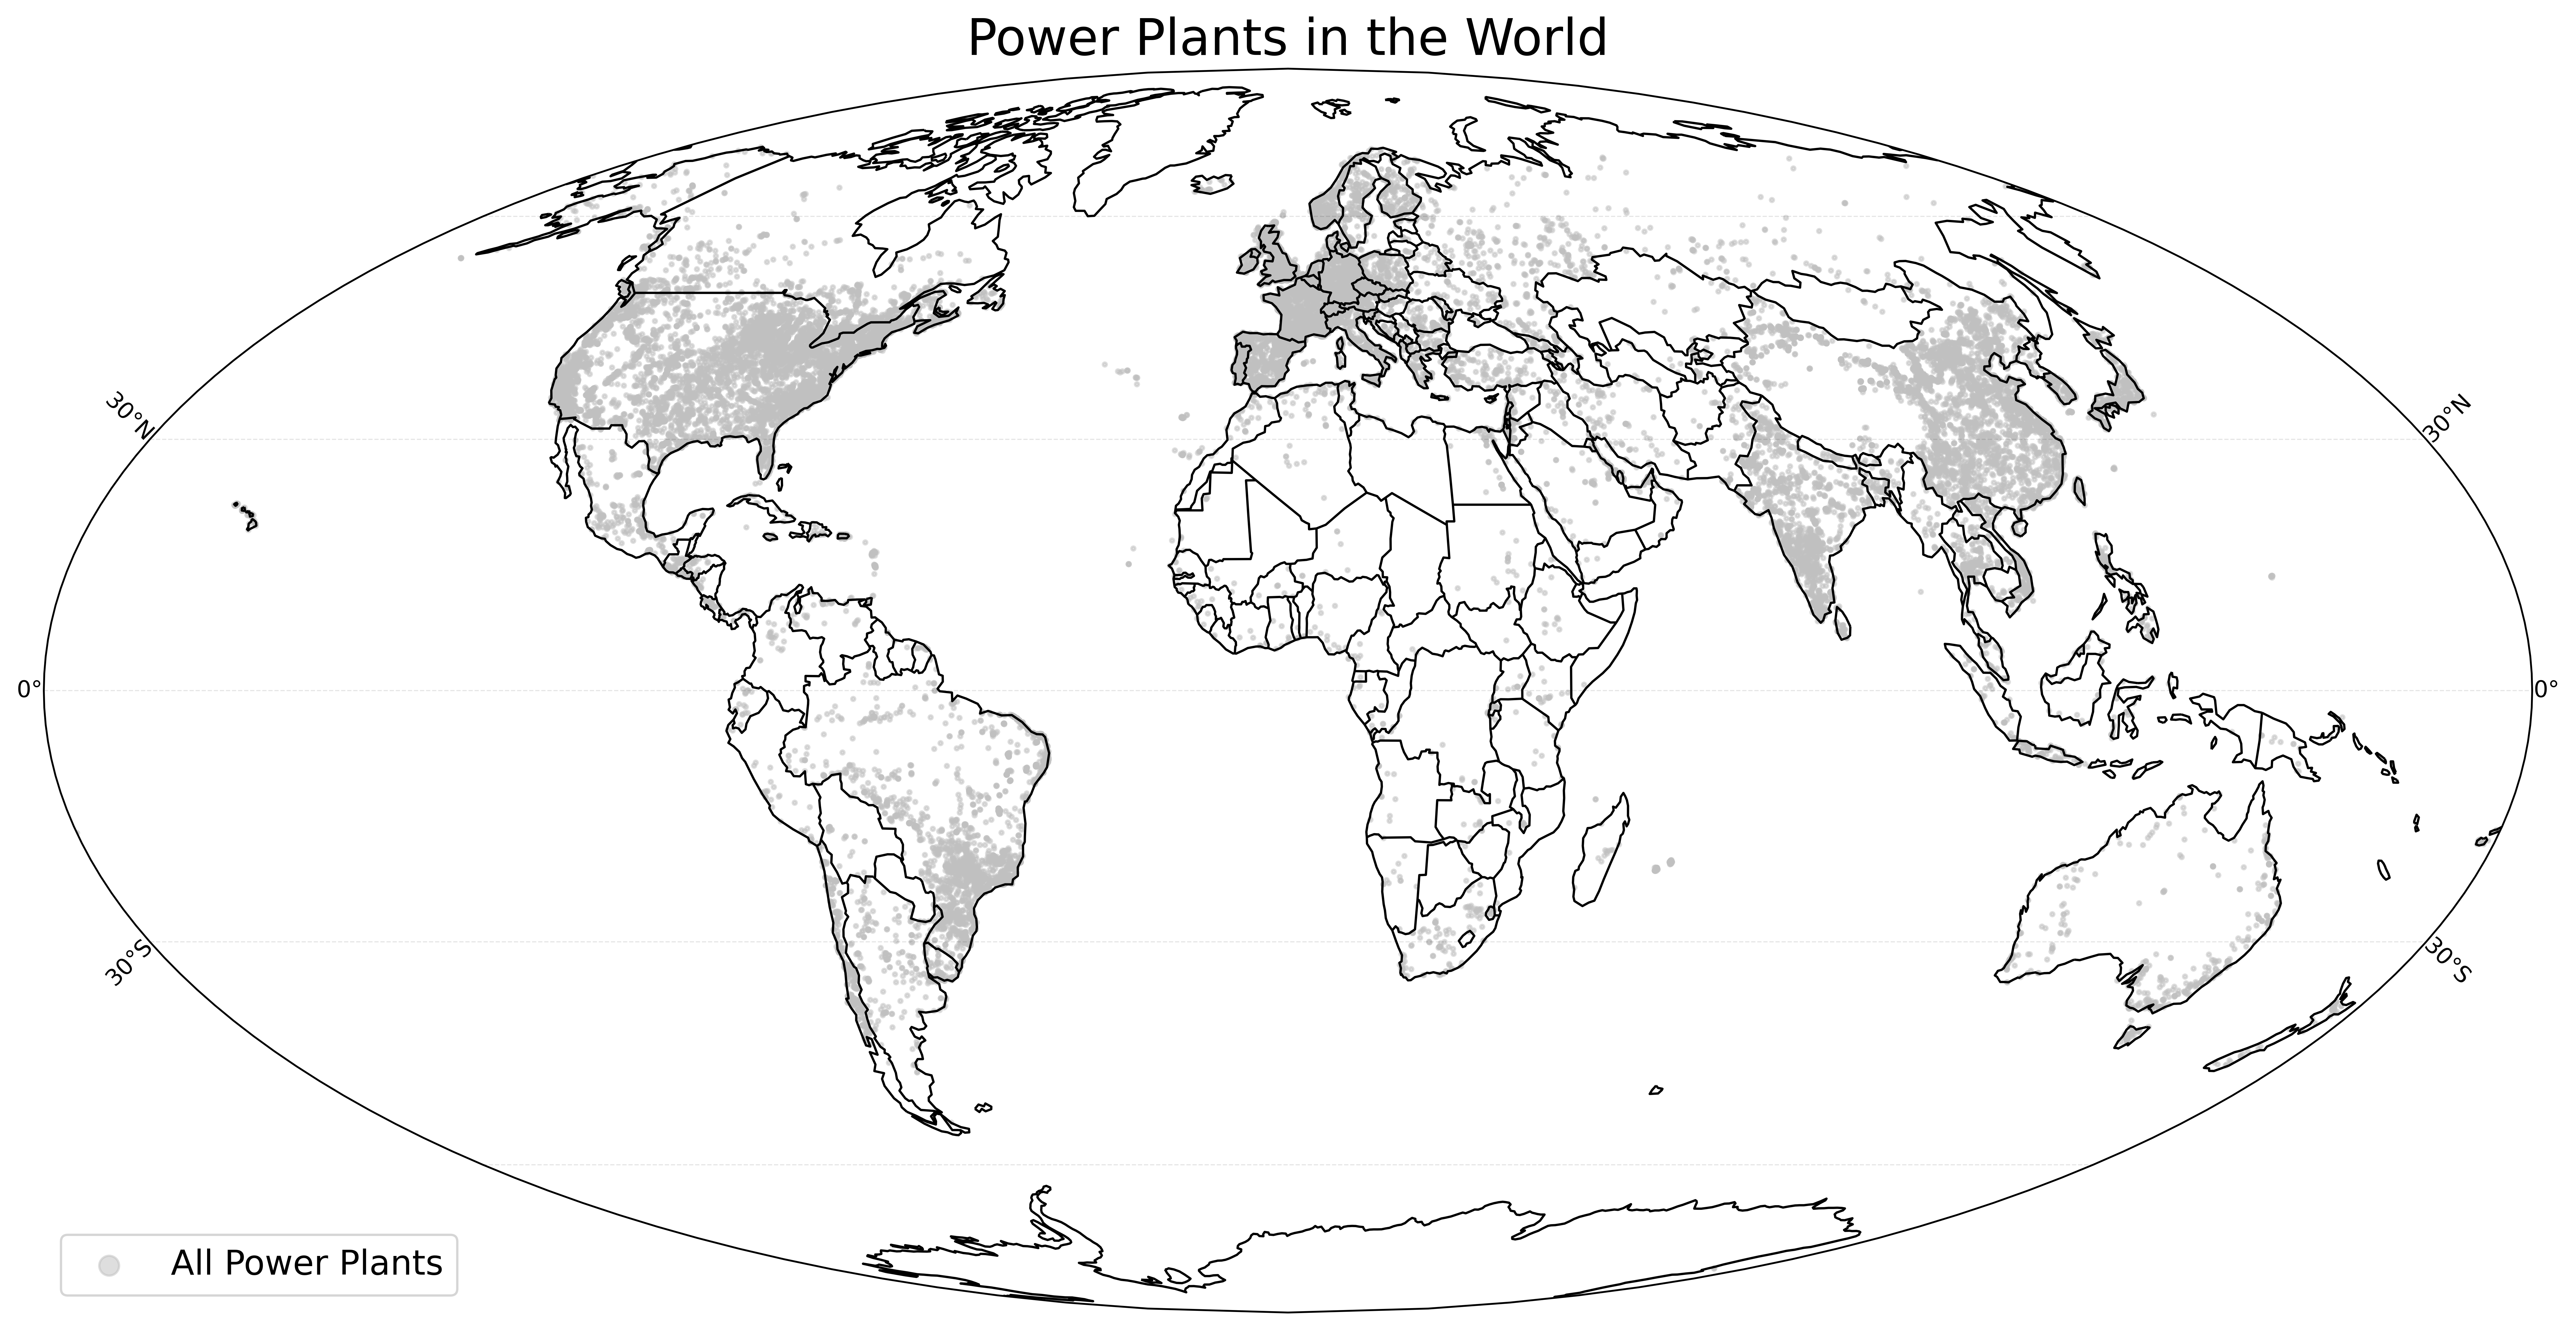

In [92]:
import cartopy.crs as ccrs # Here we import what we need to draw a map
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.patches as mpatches 
from shapely.geometry.polygon import Polygon
import cartopy.feature as cfeature

fig = plt.figure(figsize=(20,10), dpi=600)
ax = plt.axes(projection=ccrs.Mollweide()) # Here we define the map projection type. If you prefer another one, check out https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
ax.set_global()

ax.add_feature(cfeature.COASTLINE) # Here we add continental coastlines to the map. 
ax.add_feature(cfeature.BORDERS) # Here we add borders to the map.

plt.scatter(x=lon_all, y=lat_all, # Here we plot all power plants
            color="silver",
            s=3,
            alpha=0.5,
            transform=ccrs.PlateCarree(),
            label='All Power Plants')

#plt.scatter(x=lon_wind, y=lat_wind,
#            color="dodgerblue",
#            s=1,
#            alpha=0.5,
#            transform=ccrs.PlateCarree(),
#            label='Wind Power Plants')

#plt.scatter(x=lon_solar, y=lat_solar,
#            color="gold",
#            s=1,
#            alpha=0.5,
#            transform=ccrs.PlateCarree(),
#            label='Solar Power Plants')

ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.5, # Here we define the map gridlines
                color='black', alpha=0.1, linestyle='--', 
                xlocs=np.arange(-180,180,360), ylocs=np.arange(-90,90,30))
plt.legend(loc='lower left',  markerscale=5, prop={'size': 15}) # Here we define the location and size of the legend
plt.title('Power Plants in the World', fontsize=22) # Here we set a title
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1822b4d-c689-4a0a-9264-ddb09ede5724' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

**b) Now uncomment the blocks of code that let you plot the Wind and Solar power plants, to see where most of the renewable evergy comes from, in the world.**

**c) Can you plot the Coal power plants on the map?**

$\blacksquare$ End of exercise notebook